## Configurações

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, average_precision_score

from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('../data/input/creditcard_clean.csv')

## Pré-processamento para Machine Learning

In [3]:
features = df.columns[:-1]
target = df.columns[-1]

print(f'Features: {features}')
print(f'Target: {target}')

Features: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Target: Class


In [4]:
y = df['Class']
X = df.drop('Class', axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Árvore de Decisão Normal

In [6]:
tree = DecisionTreeClassifier(random_state=42)

In [7]:
tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [8]:
y_pred = tree.predict(X_test)

In [9]:
results_normal = {
    "Modelo": "Normal",
    "ROC-AUC": roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]),
    "PR-AUC": average_precision_score(y_test, tree.predict_proba(X_test)[:,1]),
    "Precision": classification_report(y_test, y_pred, output_dict=True)["1"]["precision"],
    "Recall": classification_report(y_test, y_pred, output_dict=True)["1"]["recall"],
    "F1": classification_report(y_test, y_pred, output_dict=True)["1"]["f1-score"],
}


In [10]:
cm_normal = confusion_matrix(y_test, y_pred)

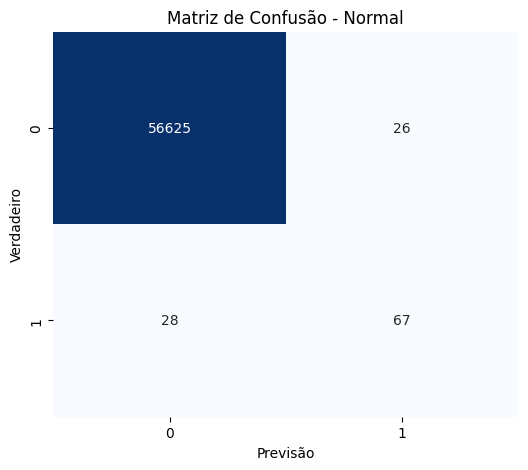

In [11]:
plt.figure(figsize=(6,5))
sns.heatmap(cm_normal, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Normal')
plt.show()

## Árvore de Decisão com SMOTE

In [12]:
sm = SMOTE(random_state=42)

In [13]:
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [14]:
tree_sm = DecisionTreeClassifier(random_state=42)

In [15]:
tree_sm.fit(X_train_sm, y_train_sm)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
y_pred_sm = tree_sm.predict(X_test)

In [17]:
results_smote = {
    "Modelo": "SMOTE",
    "ROC-AUC": roc_auc_score(y_test, tree_sm.predict_proba(X_test)[:,1]),
    "PR-AUC": average_precision_score(y_test, tree_sm.predict_proba(X_test)[:,1]),
    "Precision": classification_report(y_test, y_pred_sm, output_dict=True)["1"]["precision"],
    "Recall": classification_report(y_test, y_pred_sm, output_dict=True)["1"]["recall"],
    "F1": classification_report(y_test, y_pred_sm, output_dict=True)["1"]["f1-score"],
}

In [18]:
cm_sm = confusion_matrix(y_test, y_pred_sm)

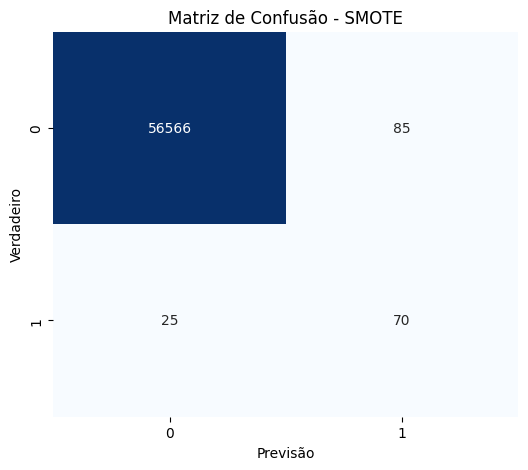

In [19]:
plt.figure(figsize=(6,5))
sns.heatmap(cm_sm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - SMOTE')
plt.show()

## Árvore de Decisão com Pesos Ajustados

In [20]:
tree_w = DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [21]:
tree_w.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [22]:
y_pred_w = tree_w.predict(X_test)

In [23]:
results_weights = {
    "Modelo": "Pesos Ajustados",
    "ROC-AUC": roc_auc_score(y_test, tree_w.predict_proba(X_test)[:,1]),
    "PR-AUC": average_precision_score(y_test, tree_w.predict_proba(X_test)[:,1]),
    "Precision": classification_report(y_test, y_pred_w, output_dict=True)["1"]["precision"],
    "Recall": classification_report(y_test, y_pred_w, output_dict=True)["1"]["recall"],
    "F1": classification_report(y_test, y_pred_w, output_dict=True)["1"]["f1-score"],
}

In [24]:
cm_w = confusion_matrix(y_test, y_pred_w)

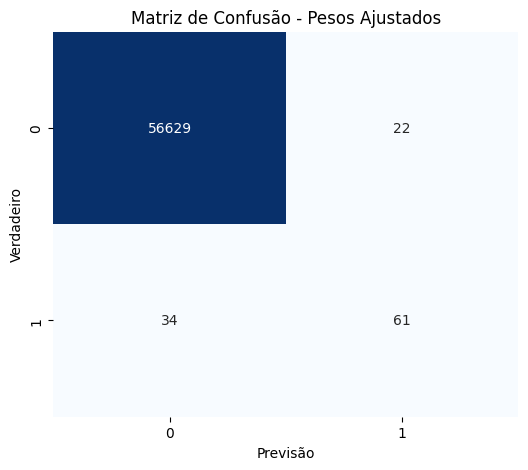

In [25]:
plt.figure(figsize=(6,5))
sns.heatmap(cm_w, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Pesos Ajustados')
plt.show()

## Comparação dos Modelos

In [26]:
df_results = pd.DataFrame([results_normal, results_smote, results_weights])

In [27]:
df_results

,Modelo,ROC-AUC,PR-AUC,Precision,Recall,F1
0,Normal,0.852402,0.508586,0.720430,0.705263,0.712766
1,SMOTE,0.867671,0.333208,0.451613,0.736842,0.560000
2,Pesos Ajustados,0.820858,0.472508,0.734940,0.642105,0.685393
